In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [5]:
df = pd.read_csv("C:/Users/Rifa Rahman/Desktop/Entri/machine learning/house_price.csv")


In [6]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [94]:

#1.mean function
df.price_per_sqft.mean()

5575.925513196481

In [89]:
#2.percentile method
percentile_25=df.price_per_sqft.quantile([0.25])
percentile_50=df.price_per_sqft.quantile([0.50])
percentile_75=df.price_per_sqft.quantile([0.75])
percentile_25,percentile_50,percentile_75

(0.25    4166.0
 Name: price_per_sqft, dtype: float64,
 0.5    5188.0
 Name: price_per_sqft, dtype: float64,
 0.75    6603.0
 Name: price_per_sqft, dtype: float64)

In [44]:
non_numeric_values = df['price_per_sqft'][pd.to_numeric(df['price_per_sqft'], errors='coerce').isna()]
non_numeric_values


Series([], Name: price_per_sqft, dtype: int64)

<Axes: xlabel='price_per_sqft'>

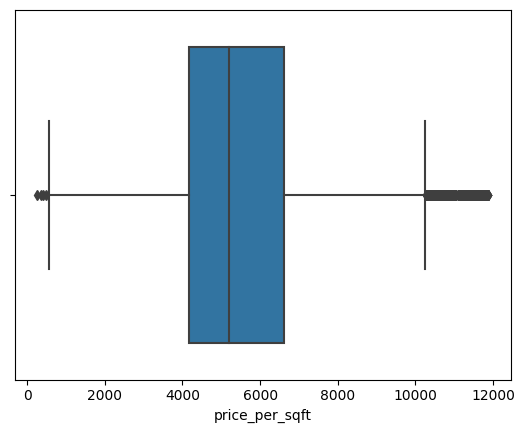

In [59]:
df['price_per_sqft'].describe()
sns.boxplot(x=df['price_per_sqft'])

In [90]:
#3.IQR method 
#detecting  and removing outliers using IQR
#q1
q1=df.price_per_sqft.quantile([0.25])
q1
#q3
q3=df.price_per_sqft.quantile([0.75])
q1,q3

(0.25    4166.0
 Name: price_per_sqft, dtype: float64,
 0.75    6603.0
 Name: price_per_sqft, dtype: float64)

In [78]:

# Calculating the IQR
iqr = q3 - q1
iqr


2437.0

In [80]:
lower_whisker=q1-1.5*iqr
lower_whisker

510.5

In [81]:
upper_whisker=q3+1.5*iqr
upper_whisker

10258.5

In [83]:
lower_whisker,upper_whisker

(510.5, 10258.5)

In [82]:
 #outliers
df[(df.price_per_sqft<510.5) | (df.price_per_sqft>10258.5)] 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592
18,other,3 BHK,2770.0,4.0,290.0,3,10469
57,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660
61,Whitefield,4 Bedroom,5700.0,5.0,650.0,4,11403
207,Padmanabhanagar,4 Bedroom,1736.0,6.0,190.0,4,10944
...,...,...,...,...,...,...,...
13159,other,6 Bedroom,1200.0,5.0,130.0,6,10833
13170,Sarjapur Road,4 BHK,4050.0,2.0,450.0,4,11111
13176,Cox Town,2 BHK,1200.0,2.0,140.0,2,11666
13196,other,4 BHK,3600.0,5.0,400.0,4,11111


In [121]:

#removing outliers
df_removed_outlier=df[(df.price_per_sqft>510.5) & (df.price_per_sqft<10258.5)] 
df_removed_outlier.price_per_sqft

0        3699
1        4615
2        4305
3        6245
4        4250
         ... 
13193    4237
13194    6530
13195    6689
13197    5258
13199    3090
Name: price_per_sqft, Length: 11507, dtype: int64

In [122]:
df_removed_outlier.price_per_sqft.describe()


count    11507.000000
mean      5377.533414
std       1682.646786
min        573.000000
25%       4117.500000
50%       5100.000000
75%       6403.000000
max      10256.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

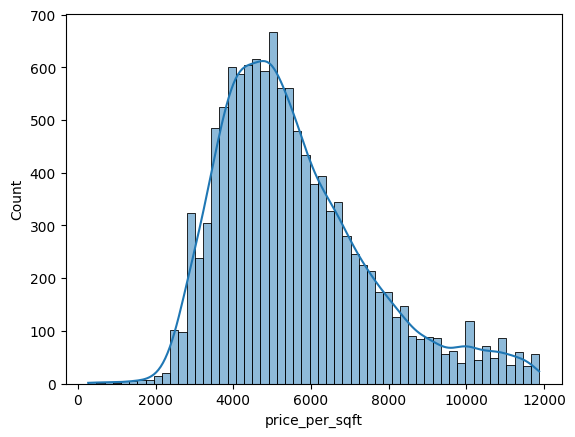

In [109]:
#4.normal distribution
sns.histplot(data=df, x=df.price_per_sqft,kde=True)


In [112]:
m= df.price_per_sqft.mean() #mean
s= df.price_per_sqft.std() #standard_deviation
m,s

(5575.925513196481, 1957.7797831903486)

In [113]:
m-3*s  #-3sigma

-297.4138363745651

In [114]:
m+3*s  # +3sigma

11449.264862767526

In [124]:
a= df[(df.price_per_sqft> -297.41)& (df.price_per_sqft <11449.27)]
a

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.997555
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.453175
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.637409
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,0.515537
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.670095
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.779407
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,3.407409
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.071039
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,2.989021


In [10]:
#5.z score method 
# z = x - m/s
a = pd.read_csv("C:/Users/Rifa Rahman/Desktop/Entri/machine learning/house_price.csv")
m = a.price_per_sqft.mean()
s = a.price_per_sqft.std()
m,s


(7920.336742424242, 106727.16032810867)

In [11]:
#z score 
a['zscore'] = (df.price_per_sqft-m)/s
a

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


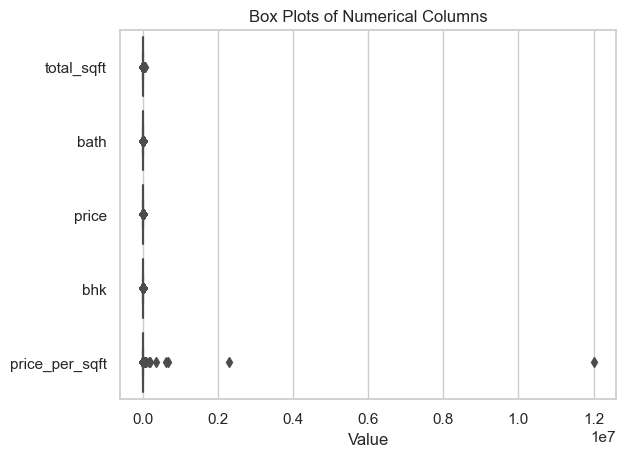

In [26]:
#plot the box plot(for all the numerical columns)
# including  numeric columns only for ploting
numeric_columns = a1.select_dtypes(include=[np.number])
sns.boxplot(data=numeric_columns, orient="h")
plt.title("Box Plots of Numerical Columns")
plt.xlabel("Value")
plt.show()

In [60]:
#plot the histplot(to check the normality of the column(price per sqft column))
h=df.price_per_sqft
h

0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13200, dtype: int64

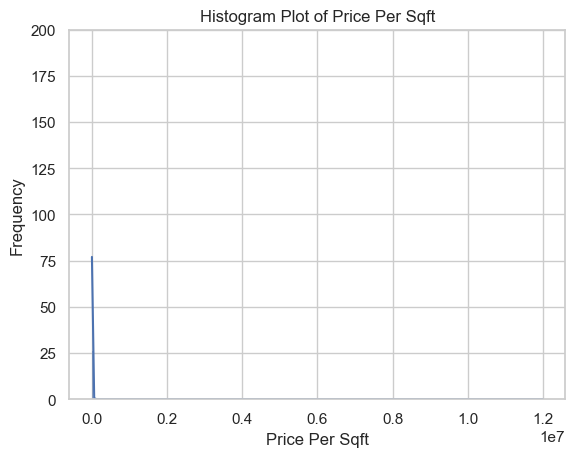

In [64]:
# Create a histogram plot for 'price_per_sqft' to check normality
sns.histplot(h, kde=True)
plt.title("Histogram Plot of Price Per Sqft")
plt.xlabel("Price Per Sqft")
plt.ylabel("Frequency")
plt.ylim(0, 200)
plt.show()  


In [70]:
#Check the correlation between all the numerical columns and plot heatmap.
numeric_col = df.select_dtypes(include=[np.number])
numeric_col
e=df.drop(["zscore","location","size"],axis=1)
e

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689
13196,3600.0,5.0,400.00,4,11111
13197,1141.0,2.0,60.00,2,5258
13198,4689.0,4.0,488.00,4,10407


In [72]:
corr=e.corr()
corr

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


<Axes: >

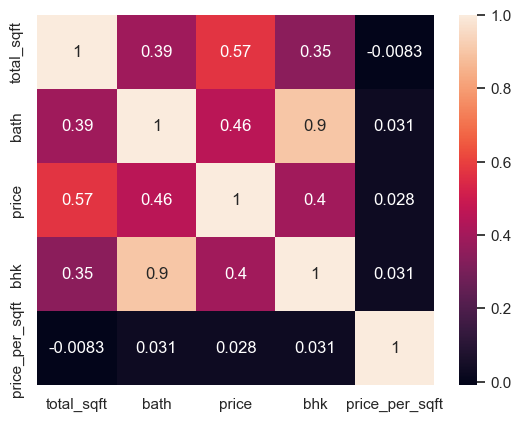

In [74]:
sns.heatmap(corr,annot=True)

C:\Users\Rifa Rahman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


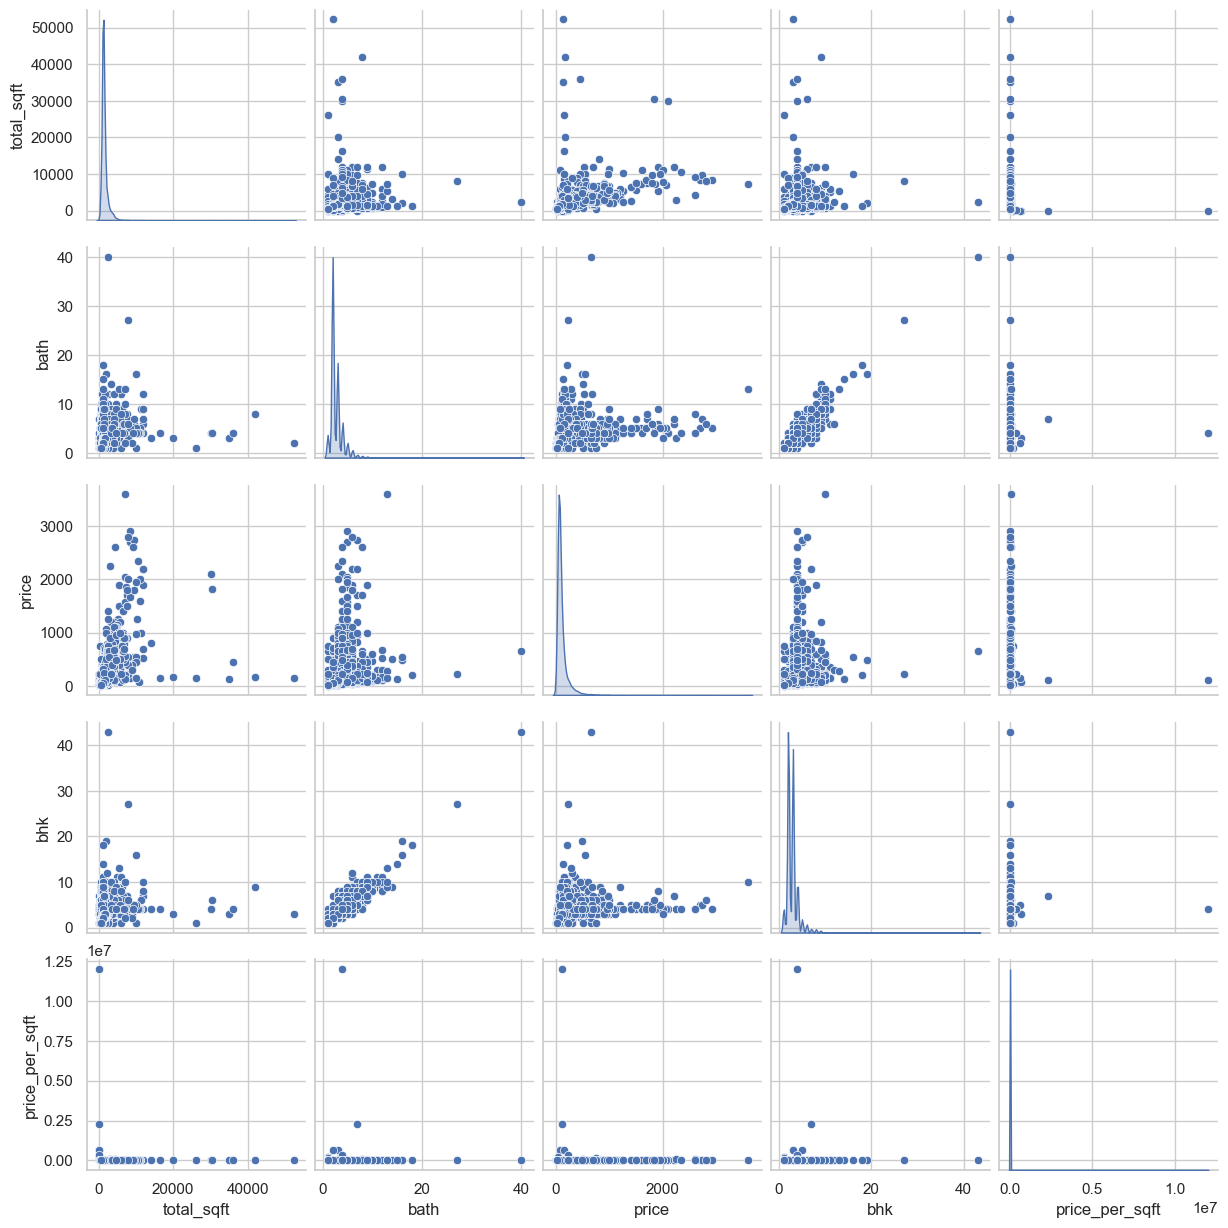

In [77]:
#Scatter plot between the variables to check the correlation between them.
g=df.drop(["zscore"],axis=1)
sns.pairplot(g, diag_kind='kde') 